Load Julia packages (libraries) needed  for the snippets in chapter 0

In [1]:
using StatisticalRethinking, CmdStan, StanMCMCChain, LinearAlgebra
gr(size=(500,500));

CmdStan uses a tmp directory to store the output of cmdstan

In [2]:
ProjDir = rel_path("..", "scripts", "04")
cd(ProjDir)

### snippet 4.7

In [3]:
howell1 = CSV.read(rel_path("..", "data", "Howell1.csv"), delim=';')
df = convert(DataFrame, howell1);

Use only adults

In [4]:
df2 = filter(row -> row[:age] >= 18, df);
first(df2, 5)

,height,weight,age,male
,Float64⍰,Float64⍰,Float64⍰,Int64⍰
1,151.765,47.8256,63.0,1
2,139.7,36.4858,63.0,0
3,136.525,31.8648,65.0,0
4,156.845,53.0419,41.0,1
5,145.415,41.2769,51.0,0


Use data from m4.1s

Check if the m4.1s.jls file is present. If not, run the model.

In [5]:
!isfile(joinpath(ProjDir, "m4.1s.jls")) && include(joinpath(ProjDir, "m4.1s.jl"))

chn = deserialize(joinpath(ProjDir, "m4.1s.jls"))

Object of type "Chains{Float64}"

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Union{Missing, Float64}[7.92964 153.93; 7.89414 155.366; … ; 7.83105 154.765; 7.80992 154.2]

Union{Missing, Float64}[7.66182 154.089; 7.93756 154.811; … ; 7.61923 153.941; 8.19281 154.882]

Union{Missing, Float64}[7.75258 154.944; 7.99581 154.465; … ; 7.31593 154.493; 7.61014 154.152]

Union{Missing, Float64}[7.6441 154.544; 7.90717 154.603; … ; 8.08177 154.912; 7.45961 154.428]

Describe the draws

In [6]:
describe(chn)

Iterations = 1:1000
Thinning interval = 1
Chains = 1,2,3,4
Samples per chain = 1000

Empirical Posterior Estimates:
          Mean        SD       Naive SE       MCSE      ESS
sigma   7.7773874 0.28714545 0.0045401683 0.0054756899 1000
   mu 154.6061587 0.42113966 0.0066588027 0.0057181335 1000

Quantiles:
         2.5%       25.0%     50.0%     75.0%      97.5%   
sigma   7.241495   7.573695   7.76934   7.96569   8.3431633
   mu 153.770925 154.316750 154.60450 154.89825 155.4100750



Plot the density of posterior draws

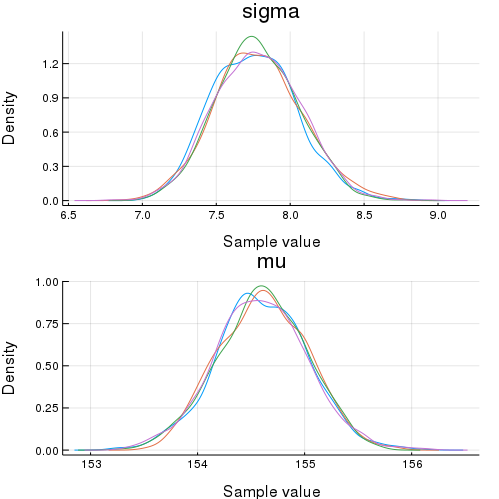

In [7]:
density(chn, lab="All heights", xlab="height [cm]", ylab="density")

Compute cor

In [8]:
mu_sigma = hcat(chn.value[:, 2, 1], chn.value[:,1, 1])
LinearAlgebra.diag(cov(mu_sigma))

2-element Array{Float64,1}:
 0.18168195236836818
 0.08103946318902908

Compute cov

In [9]:
cor(mu_sigma)

2×2 Array{Float64,2}:
 1.0        0.0740199
 0.0740199  1.0      

End of `clip_07.0s.jl`

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*